# inicializacao

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
import scipy.signal as signal
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *

from methods.utils.utilities import *
import plotly.express as px

def metrics(y, yest):
    residuo1 = y - yest
    mape = round(np.mean(np.abs(residuo1 / (yest + np.finfo(np.float64).eps))), 5)
    print('RMSE:', np.sqrt(np.mean(np.square(residuo1))), 'MSE:', np.mean(np.square(residuo1)), '\nAET:', np.sum(np.abs(residuo1)), '\nMAPE:', str(mape) + '%')

def integrate(p, ts=0.1):
    r = np.zeros(p.shape)
    r[0] = p[0] * ts
    for i in range(1, p.shape[0]):
        r[i] = r[i-1] + p[i] * ts
    return r


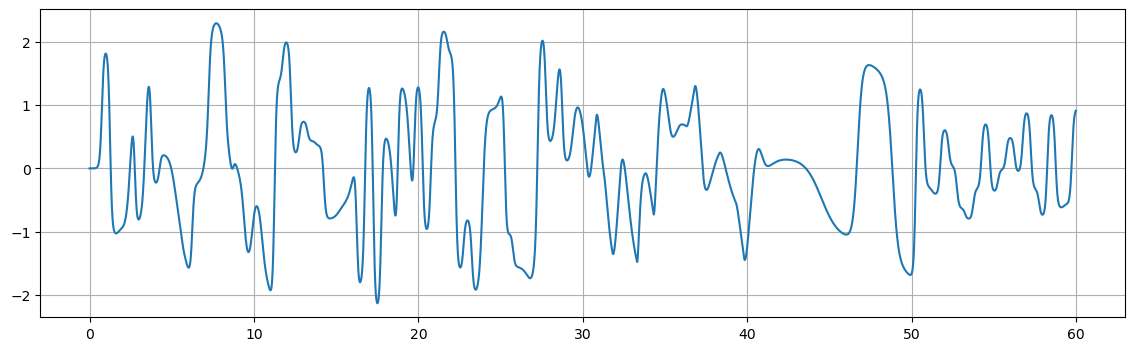

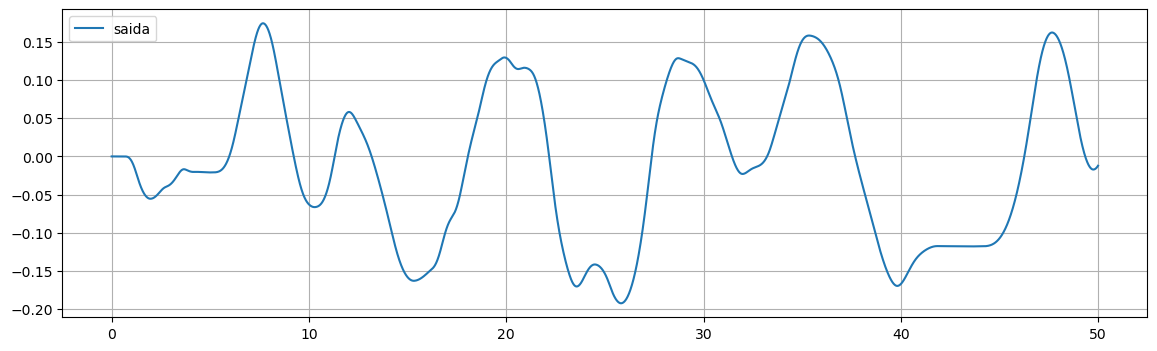

In [2]:
#my_data = np.genfromtxt('data/ballBeamTeste1.csv', delimiter=',')[1:,:]
my_data = np.genfromtxt('data/ballBeamFriction.csv', delimiter=',')[1:,:]
u = my_data[:, 0].copy()
y = my_data[:, 1].copy() 
t = my_data[:, -1].copy()

np.random.seed(15)
amplitude = 0.00001
#u += np.random.uniform(-0.0002, 0.0002, u.shape)
#y = y + np.random.uniform(-amplitude, amplitude, y.shape)

dt = my_data[1, -1]
size = 5000
plt.figure(figsize=(14, 4))
plt.plot(t, u*(180/np.pi), label="entrada")
plt.grid()
plt.show()
plt.figure(figsize=(14, 4))
plt.plot(t[:size], y[:size], label="saida")
plt.legend()
plt.grid()
plt.show()

# Estimacao

[clip(Y1.1) sin(U1.1) clip(Y1.5) clip(Y1.3) sin(U1.3)] [ 1.07782865e+00  1.32920888e-03 -4.22155318e-01  3.44326840e-01
  7.54912924e-04] [1, 11, 5, 3, 13]

Um passo a frente
RMSE: 9.01746322564981e-06 MSE: 8.131464302594667e-11 
AET: 0.04424509398582829 
MAPE: 0.01977%

Simulação livre
RMSE: 0.005423021653349188 MSE: 2.940916385269416e-05 
AET: 30.08406136966937 
MAPE: 0.1834%


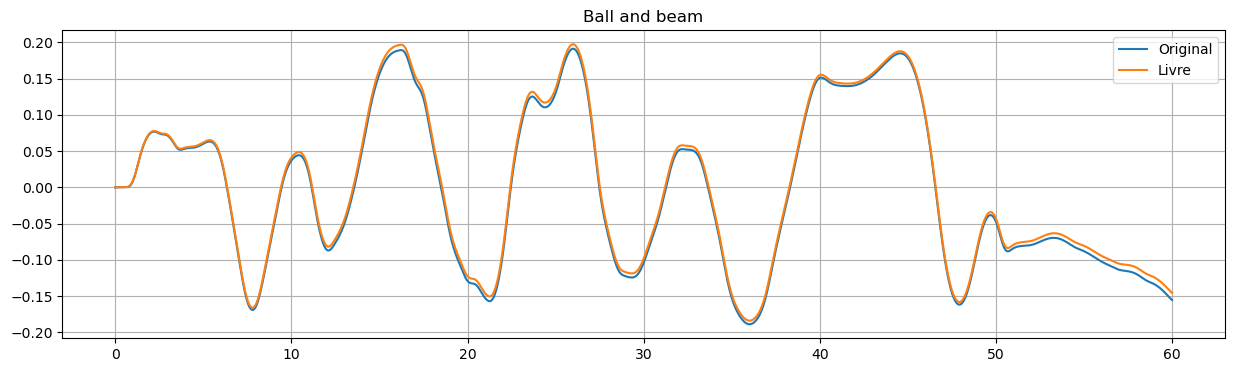

In [19]:
ui = np.reshape(u, (1, -1)).copy()
yi = np.reshape(y, (1, -1)).copy()
'''yi = np.reshape(my_data[:, 1], (1, -1)).copy()

amplitude = 0.00001
yi = yi + np.random.uniform(-amplitude, amplitude, yi.shape)
delay = 0
'''
output = 0  
num = [6]
params = []
params.append({'nb':[5],'na':[3], 'level':1, 'nonlinear':[3,0,0,0,0], 'root':False, 'delay':1, 'diff':False, 'ymodifier':[1,0]})

sselector = structureSelector()
clip.setLimit(-0.2, 0.2)
ss = sselector.symbolic_regressors(**params[output], intg=False)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

pad = max(max(params[output]['nb']), max(params[output]['na']))
aux = max(params[output]['nonlinear'])
pad = max(pad, aux)
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 1e-13)

model = ss[selected]

theta = LSM(yi[output, pad:], psi)
print(model, theta, selected)

model = ss[selected]

yhat = sselector.oneStepForward2(u=ui, y=yi, theta=theta, selected=selected, nb=params[output]['nb'], na=params[output]['na'], level=params[output]['level'], index=output, root=params[output]['root'], delay=params[output]['delay'], diff=params[output]['diff'], dt=dt, intg=False, nonlinear=params[output]['nonlinear'], ymodifier=params[output]['ymodifier'])
print("\nUm passo a frente")
metrics(yi, yhat)

slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
print("\nSimulação livre")
metrics(yi, slivre)
'''
yhat = np.zeros(yi.shape[1])
yhat[:pad] = yi[output, :pad]
yhat[pad:] = psi @ theta
print("\nUm passo a frente")
metrics(yi, yhat)

yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)
print("\nUm passo a frente")
metrics(yi, yhat)
'''

plt.figure(figsize=(15,4));plt.title("Ball and beam")
plt.plot(t, yi.T, label='Original');plt.plot(t, slivre, label='Livre')
plt.legend();plt.grid();plt.show()


## imagens

In [6]:
'''data = np.vstack((ui, yi, t)).T
#print(un.shape, s.shape, data.shape)
np.savetxt("data/ballBeamNoise.csv", data, delimiter=",", fmt="%.6f", header="input,output,time", comments="")'''

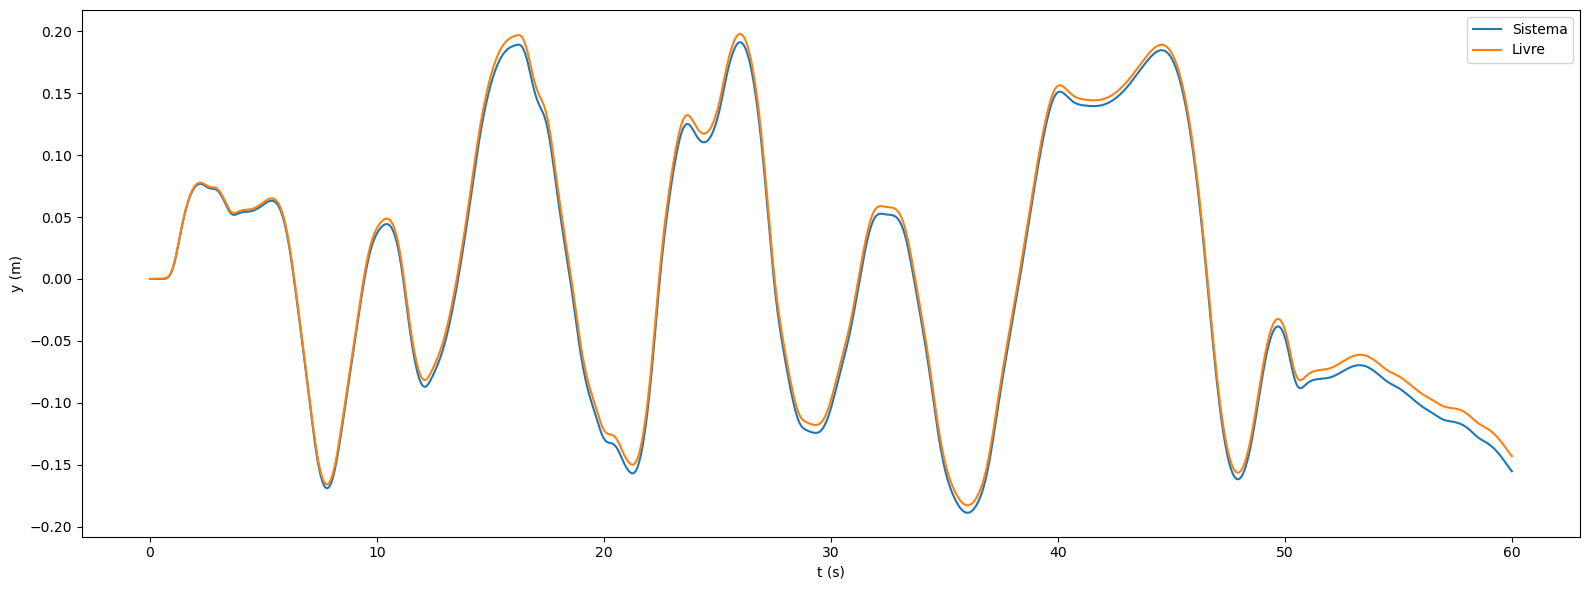

In [8]:
l = 1.5
plt.figure(figsize=(16, 6))
plt.plot(t, yi[output].T, label='Sistema', linewidth=l)
plt.plot(t, slivre, label='Livre', linewidth=l)
#plt.ylim((-0.2, 0.2))

plt.ylabel('y (m)')
plt.xlabel('t (s)')
plt.legend()
plt.tight_layout() 
#plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/ballBeamEst.png')

plt.show()

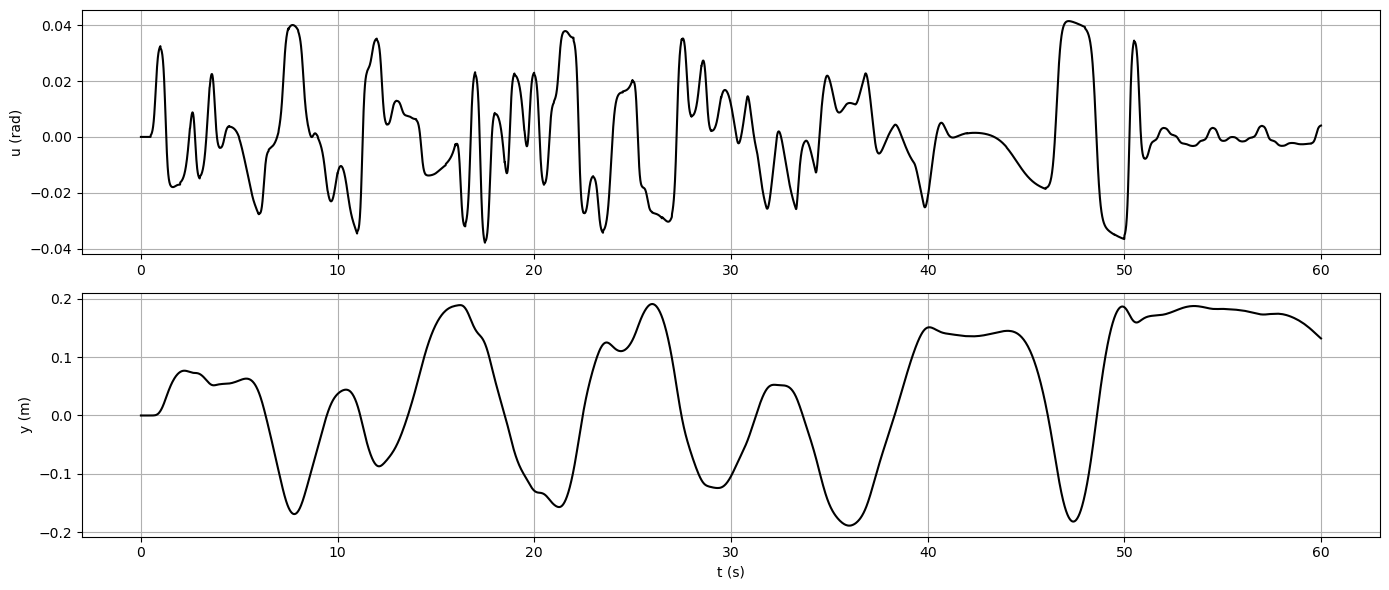

In [132]:
f, ax = plt.subplots(2, 1, figsize=[14, 6])
ax[0].plot(t, ui[0].T, label='Entrada', color='black')
ax[0].set_ylabel('u (rad)')

ax[1].plot(t, yi[0], label='Saída', color='black')
ax[1].set_ylabel('y (m)')
ax[1].set_xlabel('t (s)')


plt.tight_layout() 
plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/ballandbeamEst.png')
ax[0].grid()
ax[1].grid()
plt.show()

## antigo

[clip(Y1.1) sin(U1.1) clip(Y1.6) clip(Y1.3) U1.4] [ 0.95288552  0.00173203 -0.36473491  0.41184977  0.00103797] [1, 14, 6, 3, 12]
Simulação livre
-------- [Y1.1, Y1.2, Y1.3, Y1.4, Y1.5, Y1.6, U1.1, U1.2, U1.3, U1.4, U1.5]

Simulação livre
RMSE: 0.008027133786248676 MSE: 6.4434876822335e-05 
AET: 34.662154549117965 
MAPE: 0.12775%

Um passo a frente
RMSE: 8.72593729773751e-06 MSE: 7.61419817240466e-11 
AET: 0.04244633261821577 
MAPE: 0.02135%


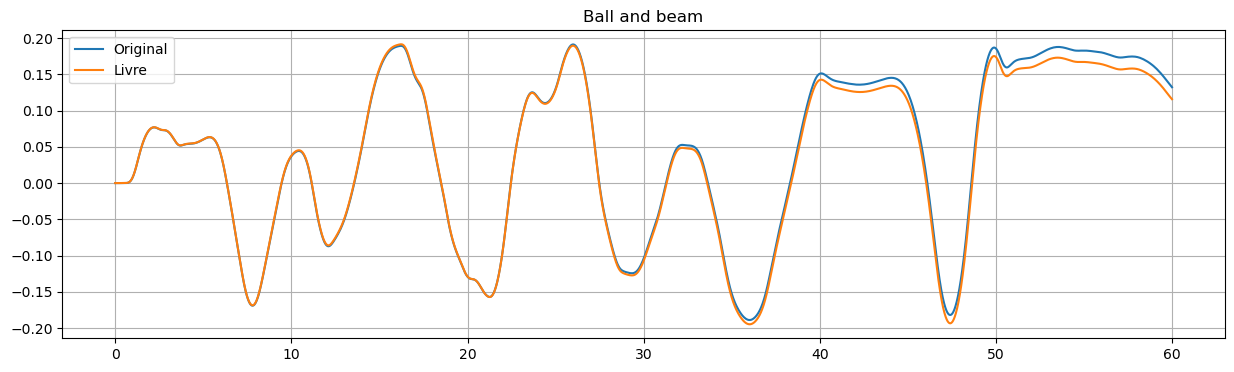

In [82]:
'''ui = np.reshape(u, (1, -1)).copy()
yi = np.reshape(my_data[:, 1], (1, -1)).copy()

amplitude = 0.00001
yi = yi + np.random.uniform(-amplitude, amplitude, yi.shape)

output = 0  
num = [6]
params = []
params.append({'nb':[6],'na':[5], 'level':1, 'nonlinear':[3,0,0,0,0], 'root':False, 'delay':1, 'diff':False, 'ymodifier':[1,0]})

sselector = structureSelector()
clip.setLimit(-0.2, 0.2)
ss = sselector.symbolic_regressors(**params[output], intg=False)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 1e-13)

model = ss[selected]

theta = LSM(yi[output, pad:], psi)
print(model, theta, selected)

model = ss[selected]

slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
print("\nSimulação livre")
metrics(yi, slivre)

yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)
print("\nUm passo a frente")
metrics(yi, yhat)

plt.figure(figsize=(15,4));plt.title("Ball and beam")
plt.plot(t, yi.T, label='Original');plt.plot(t, slivre, label='Livre')
plt.legend();plt.grid();plt.show()
'''

# Validacao

## preparação

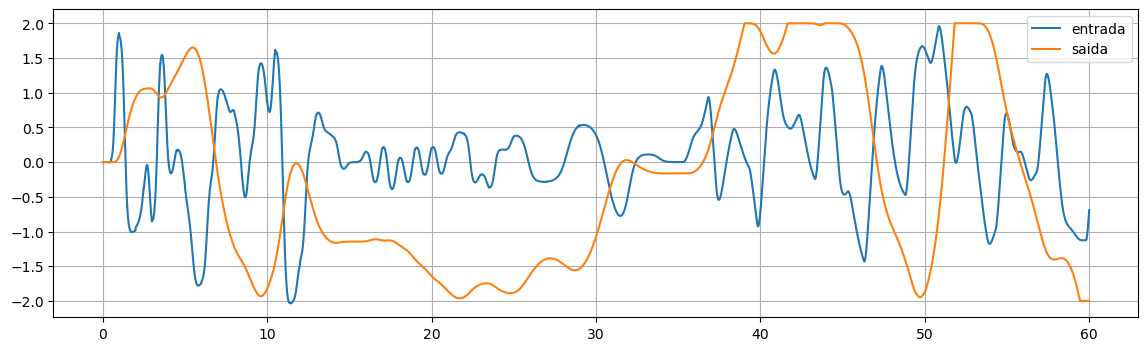

In [7]:

val_data = np.genfromtxt('data/ballBeamDataVal.csv', delimiter=',')[1:,:]

uVal = np.reshape(val_data[:, 0], (1, -1))
yVal = np.reshape(val_data[:, 1], (1, -1))
#yVal = yVal + np.random.uniform(-amplitude, amplitude, yVal.shape)

tVal = val_data[:, -1]
dt = val_data[1, -1]

plt.figure(figsize=(14, 4))
plt.plot(tVal, uVal.T*(180/np.pi), label="entrada")
plt.plot(tVal, yVal.T*10, label="saida")

plt.legend();plt.grid();plt.show()

## simul


Um passo a frente
RMSE: 8.042708070921466e-05 MSE: 6.468515311406529e-09 
AET: 0.07285121783952872 
MAPE: 0.03854%

Simulação livre
RMSE: 0.003440133621116632 MSE: 1.1834519331137031e-05 
AET: 15.268386211676836 
MAPE: 0.16669%


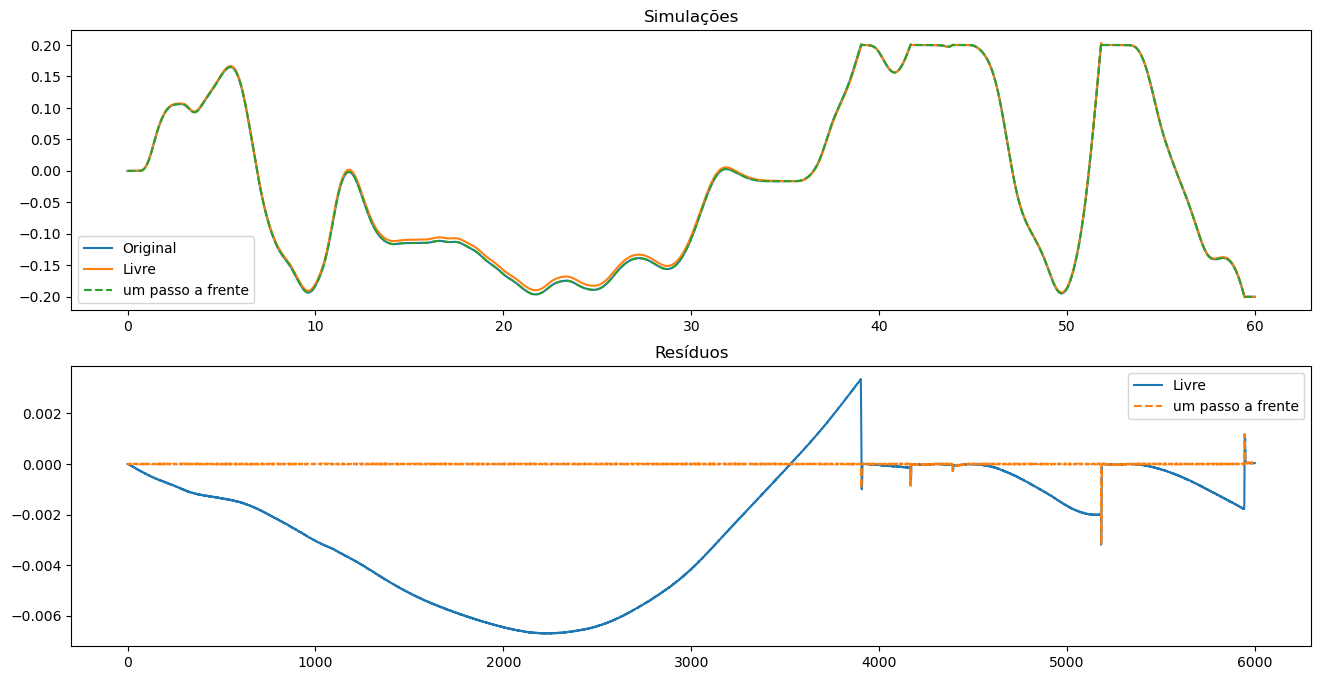

'\nSimulação livre\nRMSE: 0.0035869150526202202 MSE: 1.2865959594713516e-05 \nAET: 16.023141842724456 \nMAPE: 0.11166%\n'

In [18]:
valCandidatos = sselector.matrix_candidate(uVal, yVal, **params[output], dt=dt, intg=False)

hatVal = sselector.oneStepForward2(u=uVal, y=yVal, theta=theta, selected=selected, nb=params[output]['nb'], na=params[output]['na'], level=params[output]['level'], index=output, root=params[output]['root'], delay=params[output]['delay'], diff=params[output]['diff'], dt=dt, intg=False, nonlinear=params[output]['nonlinear'], ymodifier=params[output]['ymodifier'])
print("\nUm passo a frente")
metrics(yVal, hatVal)

'''
vPsi = valCandidatos[selected, :]
hatVal = np.zeros(yVal.shape[1])
hatVal[:pad] = yVal[output, :pad]
hatVal[pad:] = vPsi.T @ theta
print("\nUm passo a frente")
metrics(yVal, hatVal)

hatVal = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)
print("\nUm passo a frente")
metrics(yVal, hatVal)
'''

valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=0.1)
print("\nSimulação livre")
metrics(yVal, valLivre)

f, ax = plt.subplots(2,1, figsize=[16,8])

ax[0].plot(tVal, yVal[output].T, label='Original')
ax[0].plot(tVal, valLivre, label='Livre')
ax[0].plot(tVal, hatVal, '--', label='um passo a frente')
ax[0].set_title("Simulações");ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot(yVal[output].T - hatVal, '--', label='um passo a frente')
ax[1].set_title("Resíduos");ax[1].legend()
plt.show()

'''
Simulação livre
RMSE: 0.0035869150526202202 MSE: 1.2865959594713516e-05 
AET: 16.023141842724456 
MAPE: 0.11166%
'''

## arquivo

In [103]:
'''data = np.vstack((uVal, yVal, tVal)).T
#print(un.shape, s.shape, data.shape)
np.savetxt("data/ballBeamDataVal.csv", data, delimiter=",", fmt="%.6f", header="input,output,time", comments="")'''

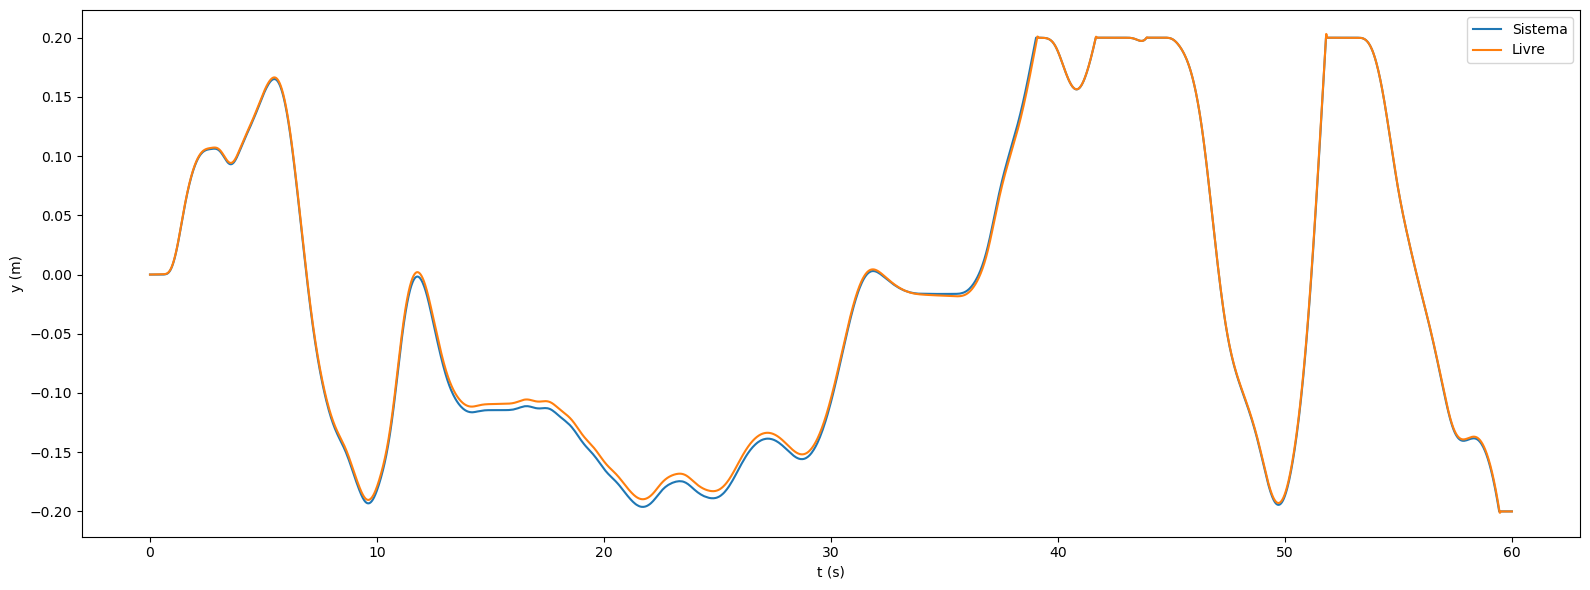

In [20]:
l = 1.5
plt.figure(figsize=(16, 6))
plt.plot(tVal, yVal[output].T, label='Sistema', linewidth=l)
plt.plot(tVal, valLivre, label='Livre', linewidth=l)
#plt.ylim((-0.2, 0.2))

plt.ylabel('y (m)')
plt.xlabel('t (s)')
plt.legend()
plt.tight_layout() 
#plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/ballBeamVal.png')

plt.show()

# Residuo

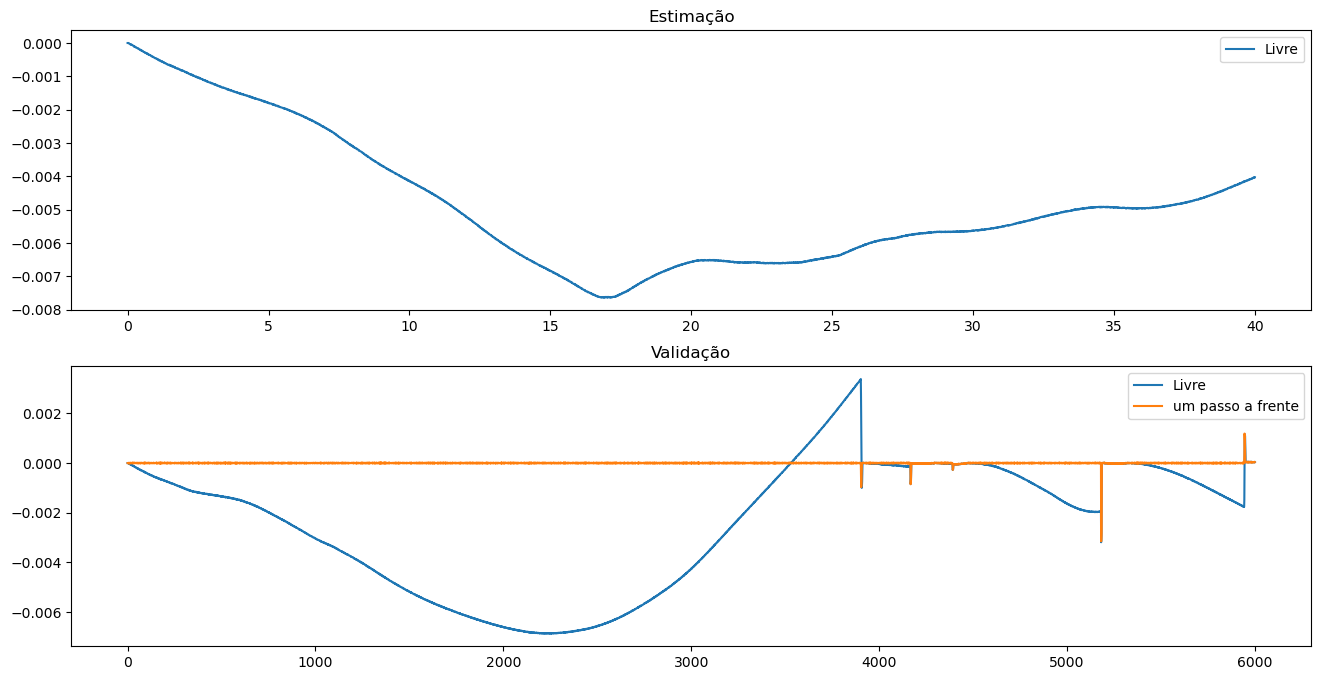

In [18]:
f, ax = plt.subplots(2,1, figsize=[16,8])

ax[0].plot(t[:4000], yi[output, :4000].T - slivre[:4000], label='Livre')
#ax[0].plot(t[:4000], yi[output, :4000].T - yhat[:4000], label='um passo a frente')
ax[0].set_title("Estimação");ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot((yVal[output].T - hatVal)[:], label='um passo a frente')
ax[1].set_title("Validação");ax[1].legend()
plt.show()

# Simple Narx

[Y1.1 U1.2 Y1.5 Y1.3] [ 1.07700103  0.00208448 -0.42290118  0.34590028] [1, 6, 5, 3]

Simulação livre
RMSE: 0.003513304966251614 MSE: 1.2343311785888254e-05 
AET: 17.961967783984488 
MAPE: 0.10709%
(8, 5995)

Um passo a frente
RMSE: 9.02260277428454e-06 MSE: 8.140736082252706e-11 
AET: 0.04427033334915731 
MAPE: 0.02541%


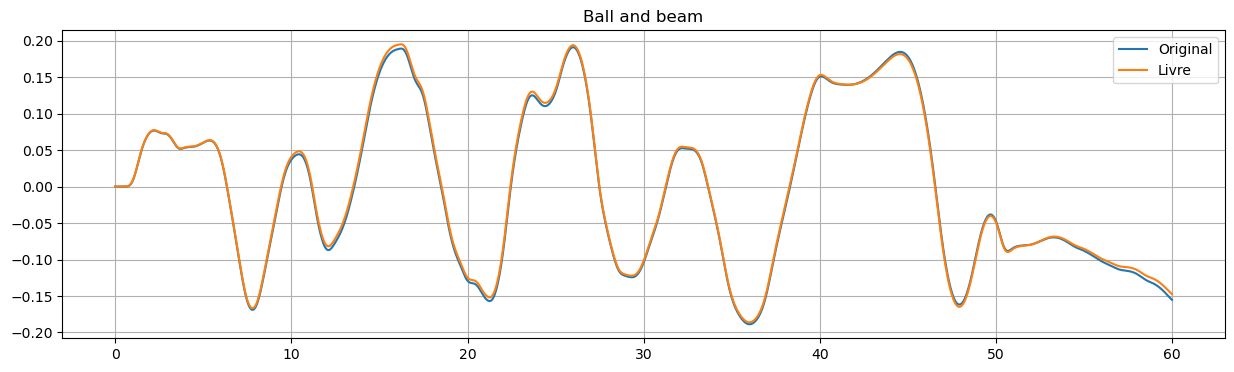

In [26]:

output = 0  
num = [6]
params = []
params.append({'nb':[5],'na':[3], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':False, 'delay':1, 'diff':False, 'ymodifier':[0,0]})

sselector = structureSelector()
clip.setLimit(-0.2, 0.2)
ss = sselector.symbolic_regressors(**params[output], intg=False)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 1e-13)

model = ss[selected]

theta = LSM(yi[output, pad:], psi)
print(model, theta, selected)

model = ss[selected]

polinomial_slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
print("\nSimulação livre")
metrics(yi, polinomial_slivre)
'''
yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)
print("\nUm passo a frente")
metrics(yi, yhat)
'''
yhat = sselector.oneStepForward2(u=ui, y=yi, theta=theta, selected=selected, nb=params[output]['nb'], na=params[output]['na'], level=params[output]['level'], index=output, root=params[output]['root'], delay=params[output]['delay'], diff=params[output]['diff'], dt=dt, intg=False, nonlinear=params[output]['nonlinear'], ymodifier=params[output]['ymodifier'])
print("\nUm passo a frente")
metrics(yi, yhat)

plt.figure(figsize=(15,4));plt.title("Ball and beam")
plt.plot(t, yi.T, label='Original');plt.plot(t, polinomial_slivre, label='Livre')
plt.legend();plt.grid();plt.show()



Simulação livre
RMSE: 2.7065624872439993 MSE: 7.325480497356423 
AET: 7445.918868929021 
MAPE: 4.8424%
(8, 5995)

Um passo a frente
RMSE: 8.049090493171363e-05 MSE: 6.47878577672616e-09 
AET: 0.07288238178705425 
MAPE: 0.03893%


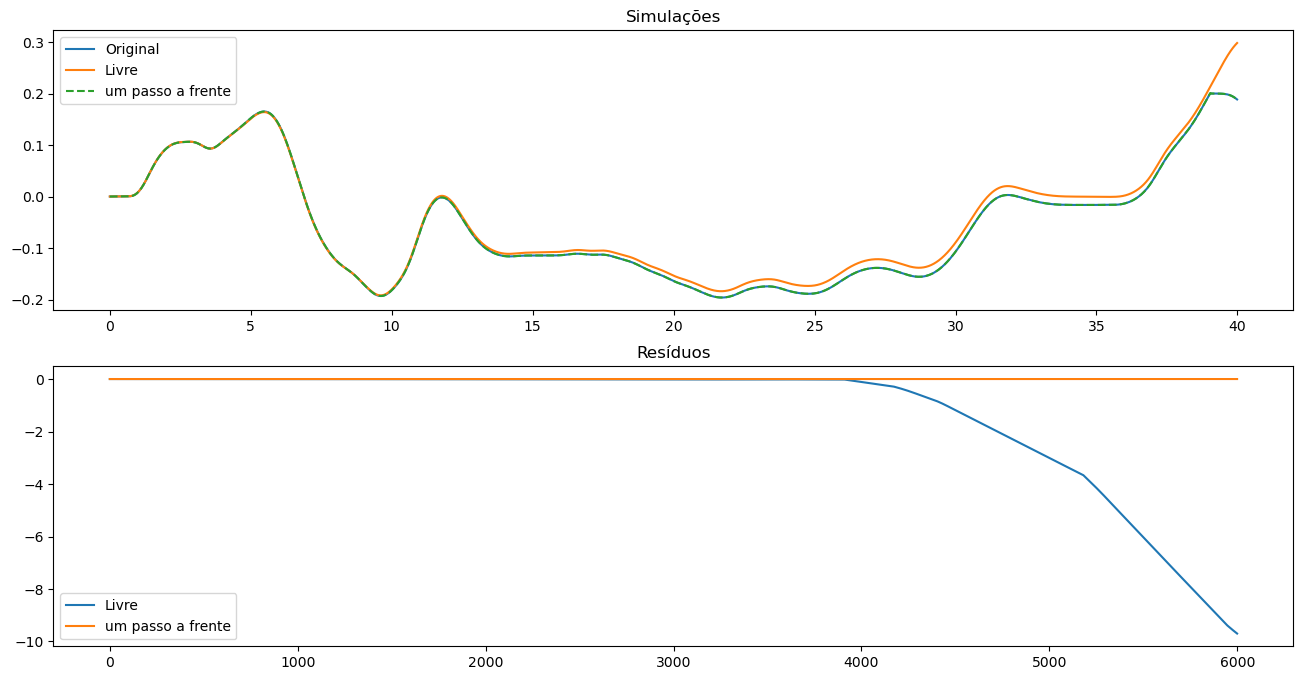

'\nhatVal = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output][\'nb\'], params[output][\'na\'], output, params[output][\'delay\'], dt=0.1)\nprint("\nUm passo a frente")\nmetrics(yVal, hatVal)\n\nSimulação livre\nRMSE: 0.005098985623454428 MSE: 2.5999654388194944e-05 \nAET: 17.15177680094702 \nMAPE: 0.18957%\n\nUm passo a frente\nRMSE: 8.049090493171363e-05 MSE: 6.47878577672616e-09 \nAET: 0.07288238178705425 \nMAPE: 0.03893%\n'

In [28]:
polinomial_valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=0.1)

print("\nSimulação livre")
metrics(yVal, polinomial_valLivre)

hatVal = sselector.oneStepForward2(u=uVal, y=yVal, theta=theta, selected=selected, nb=params[output]['nb'], na=params[output]['na'], level=params[output]['level'], index=output, root=params[output]['root'], delay=params[output]['delay'], diff=params[output]['diff'], dt=dt, intg=False, nonlinear=params[output]['nonlinear'], ymodifier=params[output]['ymodifier'])
print("\nUm passo a frente")
metrics(yVal, hatVal)

f, ax = plt.subplots(2,1, figsize=[16,8])

ax[0].plot(tVal[ :4000], yVal[output, :4000].T, label='Original')
ax[0].plot(tVal[ :4000], polinomial_valLivre[ :4000], label='Livre')
ax[0].plot(tVal[ :4000], hatVal[ :4000], '--', label='um passo a frente')
ax[0].set_title("Simulações");ax[0].legend()


ax[1].plot(yVal[output].T - polinomial_valLivre, label='Livre')
ax[1].plot(yVal[output].T - hatVal, label='um passo a frente')
ax[1].set_title("Resíduos");ax[1].legend()
plt.show()

'''
hatVal = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)
print("\nUm passo a frente")
metrics(yVal, hatVal)

Simulação livre
RMSE: 0.005098985623454428 MSE: 2.5999654388194944e-05 
AET: 17.15177680094702 
MAPE: 0.18957%

Um passo a frente
RMSE: 8.049090493171363e-05 MSE: 6.47878577672616e-09 
AET: 0.07288238178705425 
MAPE: 0.03893%
'''

# Comparativo

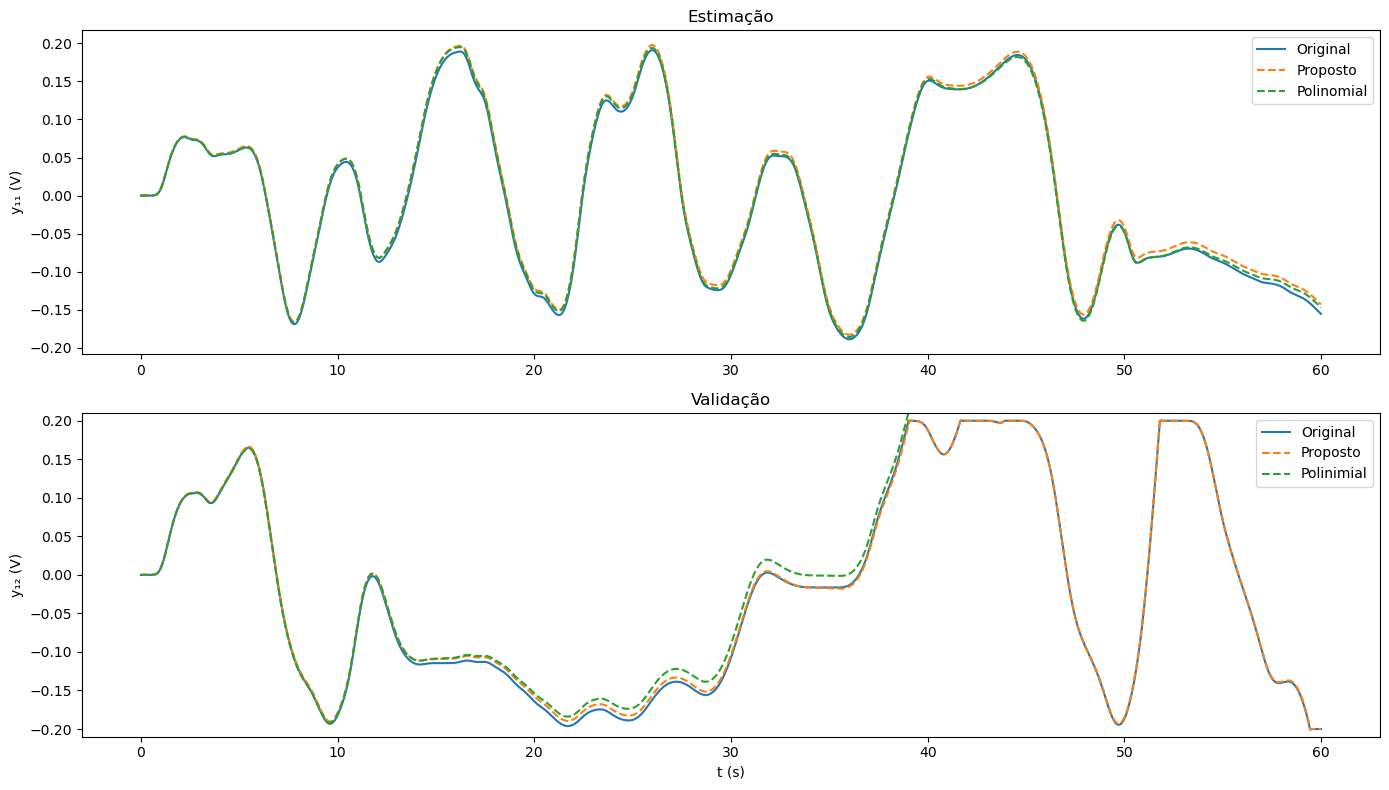

In [57]:
p = np.arange(0, 10, 0.02)

f, ax = plt.subplots(2, 1, figsize=[14, 8])
ax[0].plot(t, yi.T, label='Original')
ax[0].plot(t, slivre, '--', label='Proposto')
ax[0].plot(t, polinomial_slivre, '--', label='Polinomial')

ax[0].set_ylabel('y\u2081\u2081 (V)')

ax[0].set_title("Estimação")
ax[0].legend()

ax[1].plot(t, yVal.T, label='Original')
ax[1].plot(t, valLivre, '--', label='Proposto')
ax[1].plot(t, polinomial_valLivre, '--', label='Polinimial')
ax[1].set_ylabel('y\u2081\u2082 (V)')
ax[1].set_xlabel('t (s)')
ax[1].set_ylim(-0.21, 0.21)
ax[1].set_title("Validação")
ax[1].legend()

plt.tight_layout() 
plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/ballBeamComparate.png')

plt.show()